In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42  # no type-3
matplotlib.rcParams['ps.fonttype'] = 42

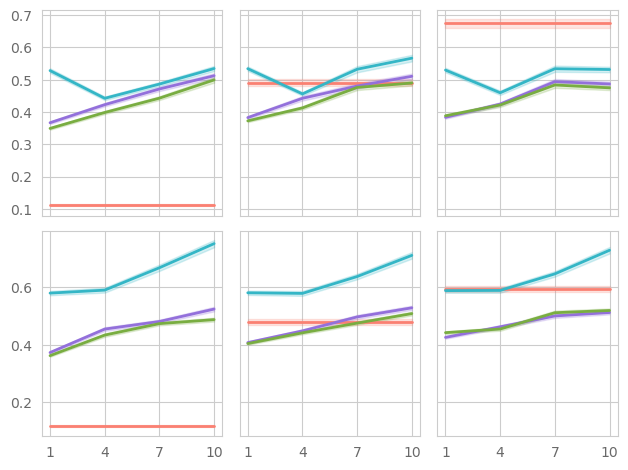

In [20]:
gp_settings = [[0,1,2],[3,4,5]]

nrct = 200
poly_degs = [1,4,7,10]
methods = ["fax","gax","hax","bax"]
plot_sigma = 2
fb_alpha_c = 0.2
fb_alpha ={"bax": fb_alpha_c, "fax": fb_alpha_c, "gax": fb_alpha_c, "hax": fb_alpha_c}
lw = 2
cp = ["#dd5129", "#0f7ba2", "#43b284", "#fab255"]
cp = ["salmon", "#34b6c6", "mediumpurple","#79ad41"]
cp_ind = {"bax": 3, "fax": 0, "gax": 1, "hax": 2}
labels = {"fax": r"$\hat{\mu}^a_{OS-OM}$", "gax": r"$\hat{\mu}^a_{OM}$", "bax": r"$\hat{\mu}^a_{ABC}$", "hax": r"$\hat{\mu}^a_{AOM}}$"}
markers = {"fax": " ", "gax": " ", "bax": " ", "hax": " "}
line_styles = {"fax": "-", "gax": "-", "bax": "-", "hax": "-"}
fill_styles = {"fax": "full", "gax": "none", "bax": "none", "hax": "full"}

fig, axes = plt.subplots(nrows=2, ncols=3,sharex='col', sharey='row')
sns.set_style("whitegrid")
sns.set_style("whitegrid")
sns.set_style("whitegrid")

for i in range(2):
    for j in range(3):
        gps = gp_settings[i][j]
        df_res = pd.read_csv(f"results_n_rct_{nrct}/gp_setting_{gps}/res_wstd.csv").rename(columns={"Unnamed: 0":"Method"})

        df_res = pd.concat([pd.concat([df_res.iloc[0:1]] * 3, ignore_index=True), df_res], ignore_index=True)
        for k, pdeg in enumerate(poly_degs):
            df_res.loc[k, "Method"] = f"fax-PD-{k}"

        for met in methods:
            met_df = df_res[df_res["Method"].str.contains(met)]
            mean_rmse = met_df["RMSE"]
            std_rmse = met_df["Std.Dev."]
            lb = mean_rmse - plot_sigma * std_rmse
            ub = mean_rmse + plot_sigma * std_rmse
            axes[i, j].plot(poly_degs, mean_rmse, color=cp[cp_ind[met]], linewidth=lw, linestyle=line_styles[met], marker=markers[met], fillstyle=fill_styles[met], label=" "*10)
            axes[i, j].fill_between(poly_degs, lb, ub, color=cp[cp_ind[met]], alpha=fb_alpha[met])
            axes[i, j].set_xticks(poly_degs)
            axes[i, j].tick_params(axis='x', colors='dimgray')
            axes[i, j].tick_params(axis='y', colors='dimgray')

plt.tight_layout()
plt.savefig(f"rmse_nrct{nrct}.svg", bbox_inches="tight")


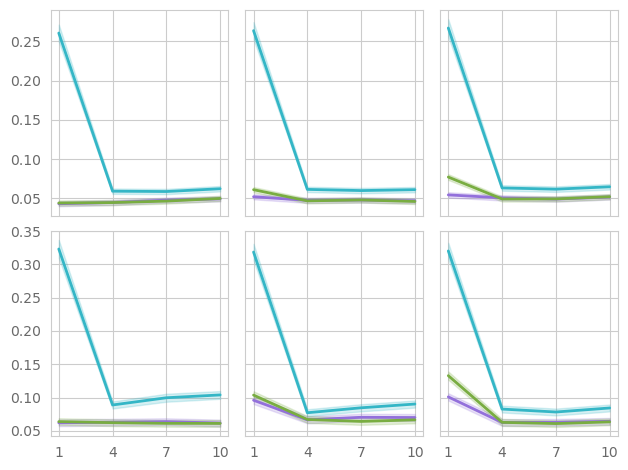

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=3,sharex='col', sharey='row')
sns.set_style("whitegrid")
sns.set_style("whitegrid")
sns.set_style("whitegrid")

for i in range(2):
    for j in range(3):
        gps = gp_settings[i][j]
        df_res = pd.read_csv(f"results_n_rct_{nrct}/gp_setting_{gps}/res_wstd.csv").rename(columns={"Unnamed: 0":"Method"})

        df_res = pd.concat([pd.concat([df_res.iloc[0:1]] * 3, ignore_index=True), df_res], ignore_index=True)
        for k, pdeg in enumerate(poly_degs):
            df_res.loc[k, "Method"] = f"fax-PD-{k}"

        for met in ["gax","hax","bax"]:
            met_df = df_res[df_res["Method"].str.contains(met)]
            mean_bias = met_df["Squared-Bias"]
            std_bias = met_df["Std.Dev..1"]
            lb = mean_bias - plot_sigma * std_bias
            ub = mean_bias + plot_sigma * std_bias
            axes[i, j].plot(poly_degs, mean_bias, color=cp[cp_ind[met]], linewidth=lw, linestyle=line_styles[met], marker=markers[met], fillstyle=fill_styles[met], label=labels[met])
            axes[i, j].fill_between(poly_degs, lb, ub, color=cp[cp_ind[met]], alpha=fb_alpha[met])
            axes[i, j].set_xticks(poly_degs)
            axes[i, j].tick_params(axis='x', colors='dimgray')
            axes[i, j].tick_params(axis='y', colors='dimgray')

plt.tight_layout()
plt.savefig(f"sqb_nrct{nrct}.svg", bbox_inches="tight")

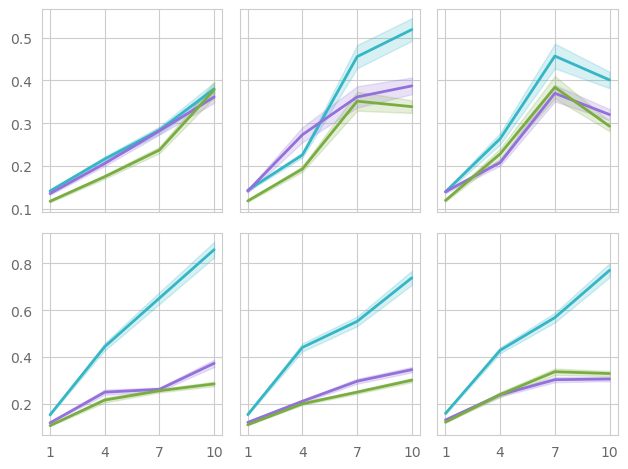

In [24]:
from matplotlib.ticker import FormatStrFormatter

fig, axes = plt.subplots(nrows=2, ncols=3,sharex='col', sharey='row')
sns.set_style("whitegrid")
sns.set_style("whitegrid")
sns.set_style("whitegrid")

for i in range(2):
    for j in range(3):
        gps = gp_settings[i][j]
        df_res = pd.read_csv(f"results_n_rct_{nrct}/gp_setting_{gps}/res_wstd.csv").rename(columns={"Unnamed: 0":"Method"})

        df_res = pd.concat([pd.concat([df_res.iloc[0:1]] * 3, ignore_index=True), df_res], ignore_index=True)
        for k, pdeg in enumerate(poly_degs):
            df_res.loc[k, "Method"] = f"fax-PD-{k}"

        for met in ["gax","hax","bax"]:
            met_df = df_res[df_res["Method"].str.contains(met)]
            mean_bias = met_df["Variance"]
            std_bias = met_df["Std.Dev..2"]
            lb = mean_bias - plot_sigma * std_bias
            ub = mean_bias + plot_sigma * std_bias
            axes[i, j].plot(poly_degs, mean_bias, color=cp[cp_ind[met]], linewidth=lw, linestyle=line_styles[met], marker=markers[met], fillstyle=fill_styles[met], label=labels[met])
            axes[i, j].fill_between(poly_degs, lb, ub, color=cp[cp_ind[met]], alpha=fb_alpha[met])
            axes[i, j].set_xticks(poly_degs)
            #axes[i, j].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
            axes[i, j].tick_params(axis='x', colors='dimgray')
            axes[i, j].tick_params(axis='y', colors='dimgray')

plt.tight_layout()
plt.savefig(f"var_nrct{nrct}.svg", bbox_inches="tight")


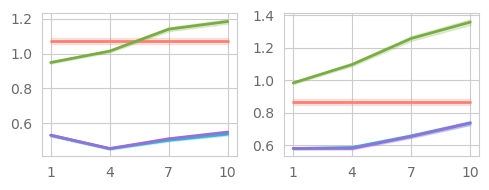

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5,2))
sns.set_style("whitegrid")
sns.set_style("whitegrid")
sns.set_style("whitegrid")


for i in range(2):
    df_res = pd.read_csv(f"faxn_results_n_rct_200/gp_setting_{i}/res_wstd.csv").rename(columns={"Unnamed: 0":"Method"})
    df_res = pd.concat([pd.concat([df_res.iloc[0:1]] * 3, ignore_index=True), df_res], ignore_index=True)

    for k, pdeg in enumerate(poly_degs):
        df_res.loc[k, "Method"] = f"fax-PD-{k}"

    for met in methods:
        met_df = df_res[df_res["Method"].str.contains(met)]
        mean_rmse = met_df["RMSE"]
        std_rmse = met_df["Std.Dev."]
        lb = mean_rmse - plot_sigma * std_rmse
        ub = mean_rmse + plot_sigma * std_rmse
        axes[i].plot(poly_degs, mean_rmse, color=cp[cp_ind[met]], linewidth=lw, linestyle=line_styles[met], marker=markers[met], fillstyle=fill_styles[met], label=labels[met])
        axes[i].fill_between(poly_degs, lb, ub, color=cp[cp_ind[met]], alpha=fb_alpha[met])
        axes[i].set_xticks(poly_degs)
        axes[i].tick_params(axis='x', colors='dimgray')
        axes[i].tick_params(axis='y', colors='dimgray')

plt.tight_layout()
plt.savefig(f"fax_noise.svg", bbox_inches="tight")
